# Perceptron

### Imports

In [20]:
from __future__ import division
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import sys 
from tqdm import tqdm
import cPickle
%matplotlib inline

### Data we'll be using

In [21]:
def get_iris_data(csv_location_of_iris_data):
    data = pd.read_csv(csv_location_of_iris_data)
    m = data.as_matrix()
    labels = m[:,0]
    labels[ labels==2 ] = 1  # squash class 2 into class 1
    labels = np.atleast_2d( labels ).T
    features = m[:,1:5]

    return labels, features

def get_cifar_data(cifar_data_location):
    def unpickle( file ):
        fo = open(file, 'rb')
        dict = cPickle.load(fo)
        fo.close()
        return dict

    data = unpickle( cifar_data_location )

    features = data['data']
    labels = data['labels']
    labels = np.atleast_2d( labels ).T

    # squash classes 0-4 into class 0, and squash classes 5-9 into class 1
    labels[ labels < 5 ] = 0
    labels[ labels >= 5 ] = 1

    return labels, features

## Perceptron Class

In [30]:
class Perceptron(object):
    """
    Perceptron Algorithm
    1. Get the features, labels, initial random weight.
    2. i in range(100):
        guesses = []
        for point in features:
            guess = get_guess(point)
            guesses.append(guess) 
            delta_w = update_w(current_weight, c, labels, guess, feature)
            w = w + delta_w
            overall_errors.append(mean_of_correct)
            overall_norms.append(norm_of_w_right_now)

    3. Plot errors
    4. Plot norms.
    """

    def __init__(self, labels, features, c):
        self.c = c 
        bias_vector = np.ones(len(features))
        self.features = np.hstack((features, np.vstack(bias_vector)))
        m,n = np.shape(self.features)

        self.labels = labels

        self.num_iters = 100

        self.W = np.random.rand(n)

    def get_guess(self, feature):
        net = np.dot(self.W, feature)

        #We only want to be returning 0's or 1's, corresponding to the classification.
        if net >= 0:
            return 1
        else:
            return 0

    def update_w(self, current_target, current_guess, current_x):
        #Dw     =  c     *   (t            -       z)       *   xi
        delta_w = self.c * (current_target - current_guess) * current_x
        return delta_w

    def get_mean_of_correct(self, guesses):
        correct = 0

        for ind, guess in enumerate(guesses):
            if guess == self.labels[ind]:
                correct +=1

        return correct / len(self.labels)

    def norm_of_w_right_now(self):
        return np.log(np.linalg.norm(self.W, 2))
    
    def plot_errors(self):
        plt.plot(self.overall_errors, label=self.c)
        plt.xlabel('Epoch Number', fontsize=14)
        plt.ylabel('Accuracy', fontsize=14)


    def plot_norms(self):
        plt.plot(self.overall_norms, label=self.c)
        plt.xlabel('Epoch Number', fontsize=14)
        plt.ylabel('Norm of Weight Matrix', fontsize=14)

    def fit(self):

        #Initialize lists which will hold the error and the norm after each iteration
        overall_errors, overall_norms = [], []

        #Now run through the algorithm
        for i in tqdm(range(self.num_iters)):
            guesses = []
            for ind, point in enumerate(self.features):

                guess = self.get_guess(point)
                guesses.append(guess)
                delta_w = self.update_w(self.labels[ind,0], guess, point)
                self.W = self.W + delta_w

            overall_errors.append(self.get_mean_of_correct(guesses))
            overall_norms.append(self.norm_of_w_right_now())

        self.overall_errors = overall_errors
        self.overall_norms = overall_norms
        

## Now let's put it into action

### Iris Dataset: famous dataset from UC-Irvine of classifying iris type by petal and sepal length

100%|██████████| 100/100 [00:00<00:00, 442.31it/s]


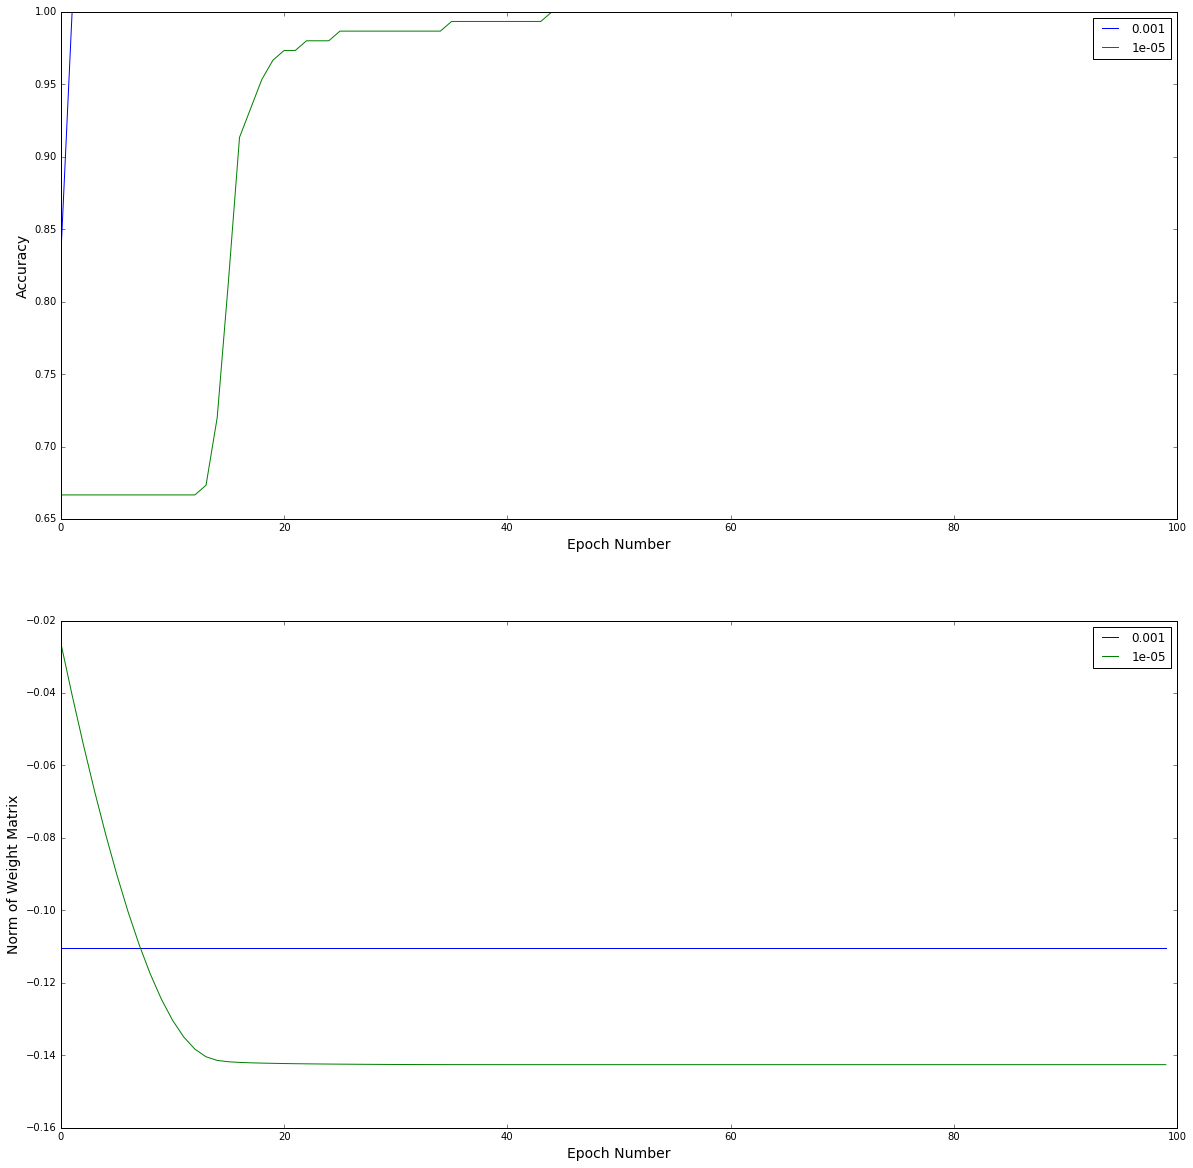

In [31]:
iris_labels, iris_features = get_iris_data('Fisher.csv')

plt.figure(figsize=(20,20))

for c in [0.001, 1e-5]:
    iris_P = Perceptron(iris_labels, iris_features, c)
    iris_P.fit()
    
    plt.subplot(211)
    iris_P.plot_errors()
    plt.legend()
    
    plt.subplot(212)
    iris_P.plot_norms()    
    plt.legend()
    
plt.show()
        

### CIFAR-10 dataset from the University of Toronto, classifying small images

100%|██████████| 100/100 [00:24<00:00,  3.99it/s]


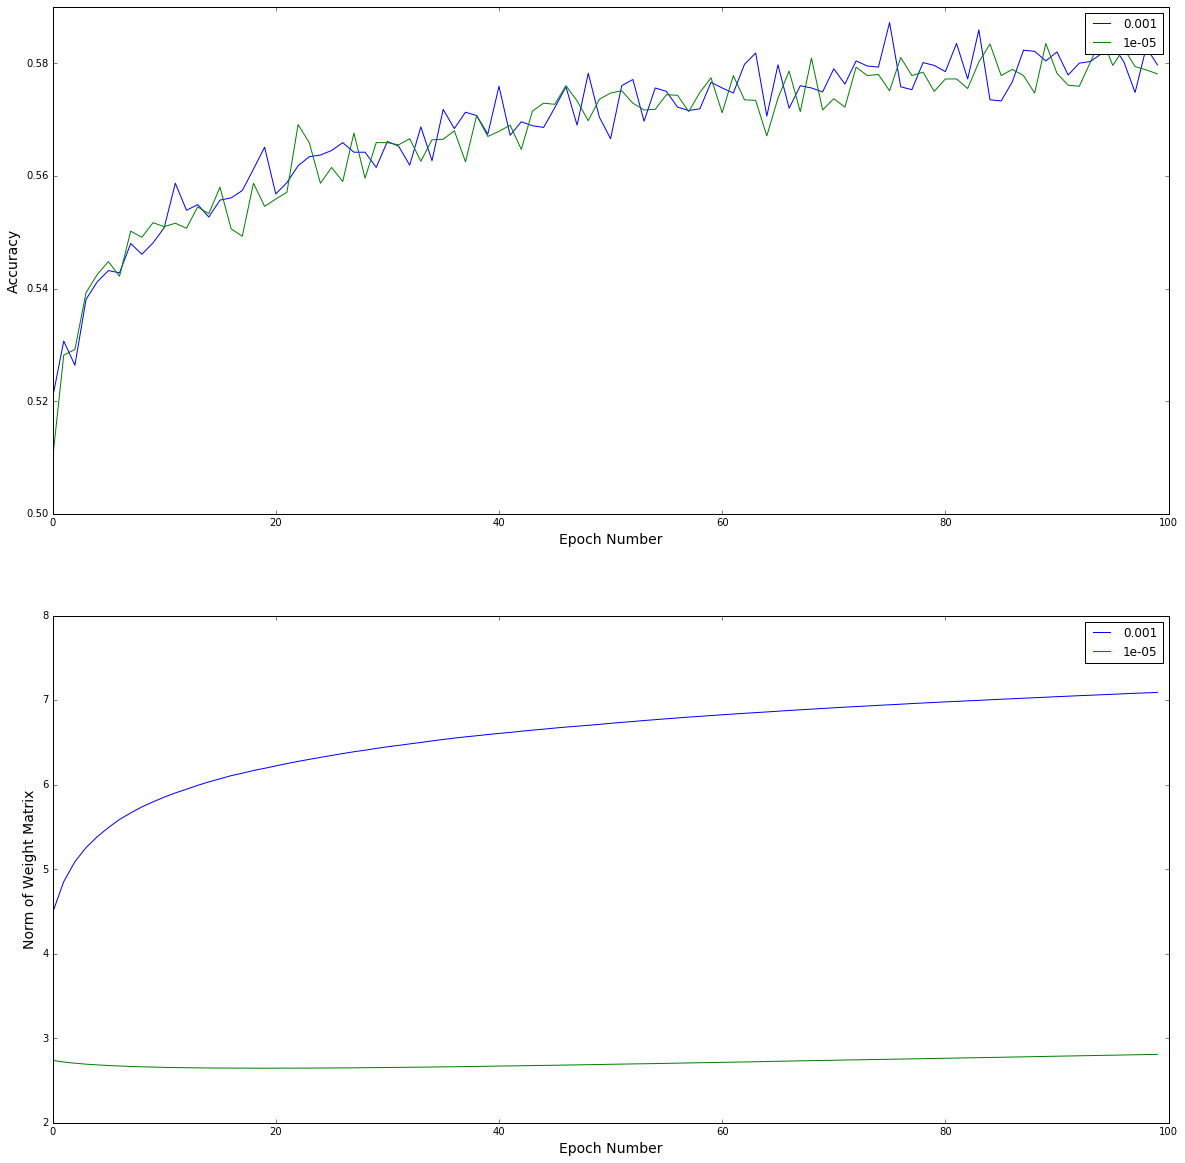

In [33]:
cifar_labels, cifar_features = get_cifar_data('cifar-10-batches-py/data_batch_1')

plt.figure(figsize=(20,20))

for c in [0.001, 1e-5]:
    cifar_P = Perceptron(cifar_labels, cifar_features, c)
    cifar_P.fit()
    
    plt.subplot(211)
    cifar_P.plot_errors()
    plt.legend()
    
    plt.subplot(212)
    cifar_P.plot_norms()
    plt.legend()
    
plt.show()